# Calculate Hutchinson Drought Severity Index (HDSI) with Python

Drought is an insidious natural hazard that results from a deficiency of precipitation from expected or "normal" that, when extended over a season or longer period of time, is insufficient to meet the demands of human activities and the environment (absolutely including agriculture).

There are quite a few of drought indices that can be applied for early warning systems for agricultureis (Sivakumar et al., 2010). Generally, they can be grouped in ***seven distinct categories***: precipitation-based indices; temperature-based indices; precipitation- and temperature-based indices; indices based on precipitation, temperature, and soil moisture/soil characteristics; indices based on precipitation, temperature, relative humidity, solar radiation, wind speed, and soil moisture/soil characteristics; indices based on remote sensing; and indices based on a composite approach (multiple indicators/indices).

Among these agricultural drought indices, the Hutchinson Drought Index (or Drought Severity Index) is one of precipitation-based indices. The index was proposed by Professor Mike Hutchinson at the ANU in 1992, where the raw monthly rainfall totals are integrated to rolling 6-monthly totals which are then ranked into percentiles by month and this is rescaled to range between -4 and +4 in keeping with the range of the Palmer Index. To match the upper limit of mild drought [-2, -1] in palmer index, set default threshold at -1 which is at 3/8ths or the 37.5th percentile of time series at each month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare data

In [2]:
data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

## Rolling sum to 6-month  and calculate HDI

In [3]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [4]:
droughtThreshold = 0.375
df_6mon['HDI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon
    
    x = df_6mon[sinds]       
    y = (x.rank()-1.0)/(len(x)-1.0)
    z = 8.0*(y-0.5)    
    df_6mon.loc[sinds, 'HDI'] = z.values[:, 0] 

In [5]:
data['HDI'] = df_6mon['HDI']
del df_6mon
data.head(7)

,Rain,Rain_6,HDI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-3.394958
1892-07-31,11.7,45.0,-2.453782


## Visualize HDI

(-936, 503)

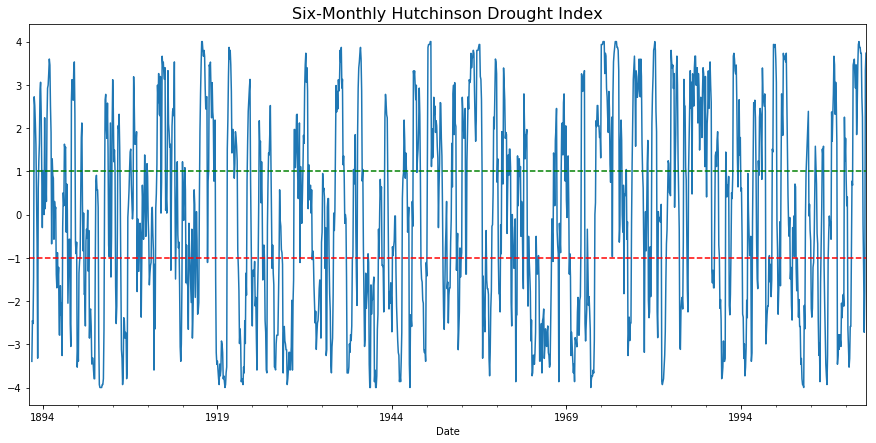

In [6]:
ax = data['HDI'].plot(figsize=(15, 7), )
ax.axhline(1,  linestyle='--', color='g')
ax.axhline(-1, linestyle='--', color='r')
ax.set_title('Six-Monthly Hutchinson Drought Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())

## Summary and discussion

It is quite easy and straightforward to calculate HSDI using only rainfall data to reflect agricultural droughts. However, this index may be too sensitive to minor fluctuations in rainfall to facilitate ranking of droughts. These percentiles may underestimate the durations of declared droughts, possibly because of probable historical anomalies in the declaration process.

The index is good at monitoring agricultural droughts during a specific historical period (e.g., 1890-2008 in Australia). However, it is difficult to apply it for assessing droughts in the future. Although the historical thresholds could be used to identify drought events, it is hard to define their extents of Severity. Under such a case, other indices such as Standardized Precipitation Index (SPI) should be more applicable.

## References

Smith, D. I, Hutchinson, M. F, & McArthur, R. J. (1992) Climatic and Agricultural Drought: Payments and Policy. (Centre for Resource and Environmental Studies, Australian National University, Canberra, Australia).

Hanigan, IC. 2012. The Hutchinson Drought Index Algorithm [Computer Software]. 
   https://github.com/ivanhanigan/HutchinsonDroughtIndex

Sivakumar, M. V. K., Stone, R., Sentelhas, P. C., Svoboda, M.,Omondi, P., Sarkar, J., and Wardlow, B.: Agricultural Drought Indices: summary and recommendations, in: Agricultural Drought Indices, Proceedings of the WMO/UNISDR Expert Group Meeting on Agricultural Drought Indices, edited by: Sivakumar, M. V.K., Motha, R. P., Wilhite, D. A., and Wood, D. A., 2–4 June 2010,AGM-11, WMO/TD No. 1572, WAOB-2011, World Meteorological Organisation, Murcia, Spain, Geneva, Switzerland,182 pp.,2010.